<a href="https://colab.research.google.com/github/ashaaf17029/Data-Warehouse-Mining-DWM-/blob/main/DWM_Exp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> Name: Suyash Katkam

> Class: TE9-B-25


> Subject: DWM

>                                 EXPERIMENT NO. 7

> **Title:** Implementation of Data Discretization (any one) & Visualization (any one).


> **Aim:** To implement Data Discretization & Visualization using Python codes.

Algorithm:
1. Input the continuous data.
2. Choose the number of bins or intervals for discretization.
3. Calculate the width of each bin using the formula:
Bin Width=Max Value−Min ValueNumber of Bins\text{Bin Width} = \frac{\text{Max Value} -
\text{Min Value}}{\text{Number of Bins}}Bin Width=Number of BinsMax Value−Min Value
4. Divide the data into equal-width intervals (bins) based on the calculated bin width.
5. Assign each data point to its respective bin.
6. Plot the histogram of the original continuous data and the discretized data for visualization.


> **Program Code:**

Program Input:
Enter the data values separated by spaces: 4 8 15 21 21 25 28 34
Enter the number of bins: 3

Program Output:
Original Data: [4.0, 8.0, 15.0, 21.0, 21.0, 25.0, 28.0, 34.0]
Equi-depth Bins: [[4.0, 8.0], [15.0, 21.0], [21.0, 25.0, 28.0, 34.0]]
Bins with Means: [[np.float64(6.0), np.float64(6.0)], [np.float64(18.0), np.float64(18.0)], [np.float64(27.0), np.float64(27.0), np.float64(27.0), np.float64(27.0)]]
Bins with Boundaries: [[4.0, 8.0], [15.0, 21.0], [21.0, 21.0, 34.0, 34.0]]

Visualization Graph:


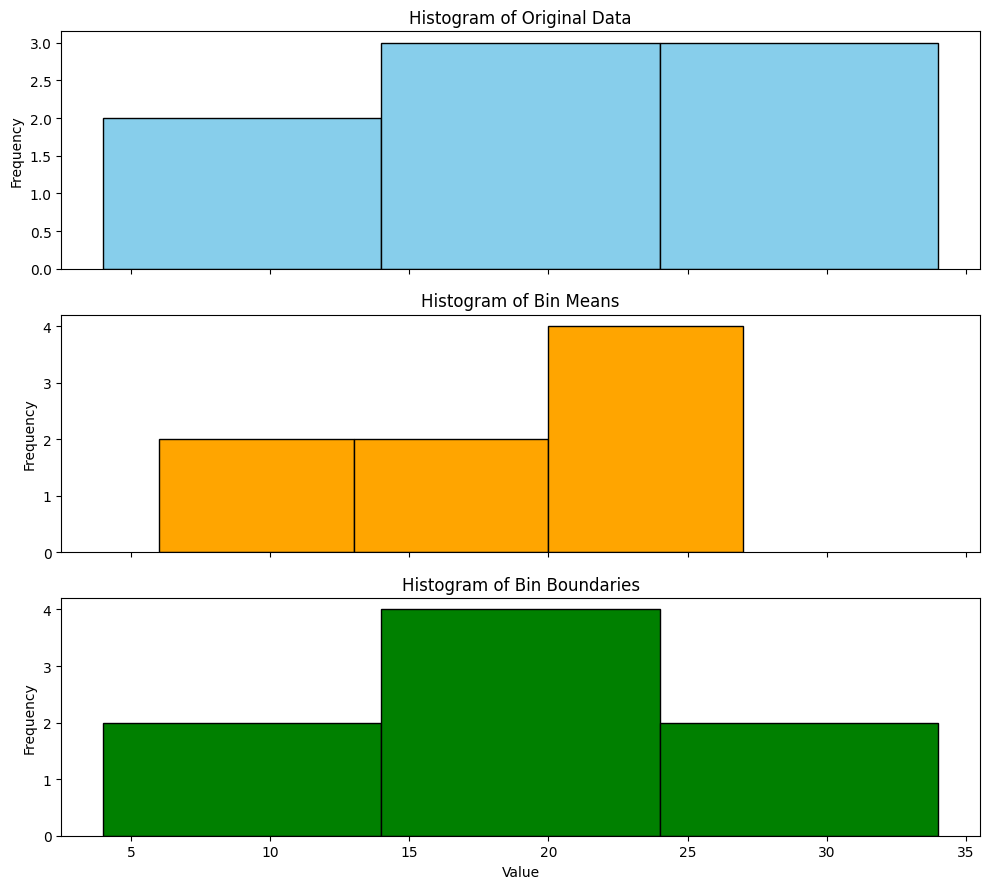

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to perform equi-depth binning
def equi_depth_binning(data, num_bins):
    sorted_data = sorted(data)
    bin_size = len(data) // num_bins
    bins = [sorted_data[i * bin_size: (i + 1) * bin_size] for i in range(num_bins - 1)]
    bins.append(sorted_data[(num_bins - 1) * bin_size:])
    return bins

# Replace each value in the bin with the bin mean
def bin_means(bins):
    return [[np.mean(bin)] * len(bin) for bin in bins]

# Replace each value in the bin with the closest boundary
def bin_boundaries(bins):
    new_bins = []
    for bin in bins:
        min_val, max_val = min(bin), max(bin)
        new_bins.append([min_val if x < (min_val + max_val) / 2 else max_val for x in bin])
    return new_bins

# Function to plot histograms
def plot_separate_histograms(data, bins, mean_bins, boundary_bins):
    # Flatten the bins for mean and boundary bins
    flattened_means = [val for bin in mean_bins for val in bin]
    flattened_boundaries = [val for bin in boundary_bins for val in bin]

    # Create subplots for three histograms with reduced height
    fig, axs = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

    # Histogram for original data
    axs[0].hist(data, bins=len(bins), color='skyblue', edgecolor='black')
    axs[0].set_title("Histogram of Original Data")
    axs[0].set_ylabel("Frequency")

    # Histogram for bin means
    axs[1].hist(flattened_means, bins=len(bins), color='orange', edgecolor='black')
    axs[1].set_title("Histogram of Bin Means")
    axs[1].set_ylabel("Frequency")

    # Histogram for bin boundaries
    axs[2].hist(flattened_boundaries, bins=len(bins), color='green', edgecolor='black')
    axs[2].set_title("Histogram of Bin Boundaries")
    axs[2].set_xlabel("Value")
    axs[2].set_ylabel("Frequency")

    plt.tight_layout()

    # Bold visualization section title
    print("\n\033[1mVisualization Graph:\033[0m")
    plt.show()

# ====== Main Program ======

# User input
print("\033[1mProgram Input:\033[0m")
data = list(map(float, input("Enter the data values separated by spaces: ").split()))
num_bins = int(input("Enter the number of bins: "))

# Equi-depth bins
bins = equi_depth_binning(data, num_bins)

# Transformed bins
mean_bins = bin_means(bins)
boundary_bins = bin_boundaries(bins)

# Bold program output title
print("\n\033[1mProgram Output:\033[0m")
print("Original Data:", data)
print("Equi-depth Bins:", bins)
print("Bins with Means:", mean_bins)
print("Bins with Boundaries:", boundary_bins)

# Plot separate histograms
plot_separate_histograms(data, bins, mean_bins, boundary_bins)